# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [420]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [421]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [422]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [423]:
# The monthly amount for the member's household income
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [424]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [425]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response,indent = 2, sort_keys = True))


{
  "data": {
    "1": {
      "circulating_supply": 19096043,
      "id": 1,
      "last_updated": 1658069364,
      "max_supply": 21000000,
      "name": "Bitcoin",
      "quotes": {
        "USD": {
          "market_cap": 404783961207,
          "percent_change_1h": 0.136759910817397,
          "percent_change_24h": 2.12123267711927,
          "percent_change_7d": -1.66333339437554,
          "percentage_change_1h": 0.136759910817397,
          "percentage_change_24h": 2.12123267711927,
          "percentage_change_7d": -1.66333339437554,
          "price": 21231.0,
          "volume_24h": 41757201960
        }
      },
      "rank": 1,
      "symbol": "BTC",
      "total_supply": 19096043,
      "website_slug": "bitcoin"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3116,
    "timestamp": 1658069364
  }
}


In [426]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response,indent = 2, sort_keys = True))


{
  "data": {
    "1027": {
      "circulating_supply": 119715701,
      "id": 1027,
      "last_updated": 1658069369,
      "max_supply": 119715956,
      "name": "Ethereum",
      "quotes": {
        "USD": {
          "market_cap": 161812345011,
          "percent_change_1h": 0.341573073738339,
          "percent_change_24h": 9.58263348407917,
          "percent_change_7d": 11.3095108487959,
          "percentage_change_1h": 0.341573073738339,
          "percentage_change_24h": 9.58263348407917,
          "percentage_change_7d": 11.3095108487959,
          "price": 1354.47,
          "volume_24h": 26359273272
        }
      },
      "rank": 2,
      "symbol": "ETH",
      "total_supply": 119715701,
      "website_slug": "ethereum"
    }
  },
  "metadata": {
    "error": null,
    "num_cryptocurrencies": 3116,
    "timestamp": 1658069369
  }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [427]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']["quotes"]['USD']["price"]
                    

# Print the current price of BTC
print(f"The current price of BTC is ${btc_price}.")


The current price of BTC is $21231.0.


In [428]:
# Navigate the ETH response object to access the current price of ETH
eth_price = eth_response['data']['1027']["quotes"]['USD']["price"]

# Print the current price of ETH
print(f"The current price of ETH is ${eth_price}.")



The current price of ETH is $1354.47.


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [429]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
print(f"The current value of {btc_coins} BTC coin is ${btc_value}")

The current value of 1.2 BTC coin is $25477.2


In [430]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
print(f"The current value of {eth_coins} ETH coin is ${eth_value:.2f}")


The current value of 5.3 ETH coin is $7178.69


In [431]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
print(f"The current cryptocurrency wallet balance is ${total_crypto_wallet:.2f}")


The current cryptocurrency wallet balance is $32655.89


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [432]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [433]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(alpaca_api_key,
                             alpaca_secret_key,
                             api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [434]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["SPY","AGG"]

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07

start_date = pd.Timestamp('2020-08-14',tz ="America/New_York").isoformat()
end_date = pd.Timestamp('2020-08-14',tz ="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [435]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
prices_df = alpaca.get_bars(tickers,
                           timeframe,
                           start = start_date,
                           end = end_date
                           ).df

prices_df
# Reorganize the DataFrame
# Separate ticker data
AGG = prices_df[prices_df['symbol'] == 'AGG'].drop("symbol",axis =1)
SPY = prices_df[prices_df['symbol'] == 'SPY'].drop("symbol", axis =1)
                
# Concatenate the ticker DataFrames
prices_df = pd.concat([AGG,SPY],axis=1, keys=["AGG","SPY"])

# Review the first 5 rows of the Alpaca DataFrame
prices_df.head()


AGG                                             \
                             open    high    low  close   volume trade_count   
timestamp                                                                      
2020-08-14 04:00:00+00:00  118.43  118.49  118.2  118.2  4556476       13664   

                                          SPY                          \
                                 vwap    open    high     low   close   
timestamp                                                               
2020-08-14 04:00:00+00:00  118.339293  336.43  337.42  335.62  336.84   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2020-08-14 04:00:00+00:00  49388493      249675  336.677903

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [436]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(prices_df["AGG"]["close"])

# Print the AGG closing price
print(f"AGG closing price:{agg_close_price}")
type(agg_close_price)

AGG closing price:118.2


float

In [437]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price =  float(prices_df["SPY"]["close"])

# Print the SPY closing price
print(f"SPY closing price:{spy_close_price}")
type(spy_close_price)


SPY closing price:336.84


float

#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [438]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_shares * agg_close_price

# Print the current value of the bond portfolio
print(f"The current value of {agg_shares} AGG share is ${agg_value}")


The current value of 200 AGG share is $23640.0


In [439]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_shares * spy_close_price

# Print the current value of the stock portfolio
print(f"The current value of {spy_shares} SPY share is ${spy_value:.2f}")



The current value of 110 SPY share is $37052.40


In [440]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}")


The current balance of the stock and bond portion of the portfolio is $60692.40


In [441]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"The total value of the member's entire savings portfolio is ${total_portfolio:.2f}")


The total value of the member's entire savings portfolio is $93348.29


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [442]:
# Consolidate financial assets data into a Python list
savings_data = [31548.85, 60692.40]

# Review the Python list savings_data
savings_data 

    

[31548.85, 60692.4]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [443]:
# Create a Pandas DataFrame called savings_df 
#savings_data = [31548.85, 60692.40]
#savings_df = pd.DataFrame({"amount":savings_data},index = ["Crypto","stock/bond"])
#savings_data = {"amount":[31548.85, 60692.40]}
#savings_df = pd.DataFrame(savings_data,index = ["Crypto","stock/bond"])

savings_df = pd.DataFrame(savings_data,columns=['amount'],index = ["Crypto","stock/bond"])

# Display the savings_df DataFrame
savings_df


,amount
Crypto,31548.85
stock/bond,60692.40


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition - Crypto and Stock/Bond'}, ylabel='amount'>

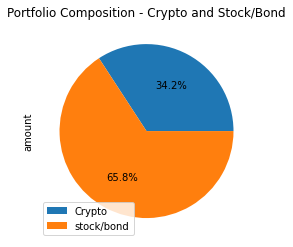

In [444]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y ="amount",title = "Portfolio Composition - Crypto and Stock/Bond", labels= None,autopct='%1.1f%%')


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [445]:
# Create a variable named emergency_fund_value
emergency_fund_value = 3 * monthly_income
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [446]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print("Congratulations! You have enough money in the fund.")
elif total_portfolio == emergency_fund_value:
    print("Congratulations for reaching your financial goal")
else:
    print(f"you still have ${emergency_fund_value - total_portfolio} left to achieve your goal.")



Congratulations! You have enough money in the fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [447]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start_date = pd.Timestamp('2019-07-14',tz = "America/New_York").isoformat()
                          
end_date = pd.Timestamp('2022-07-14',tz = "America/New_York").isoformat()

In [448]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
prices_df = alpaca.get_bars(tickers,
                           timeframe,
                           start = start_date,
                           end = end_date
                           ).df

prices_df

# Reorganize the DataFrame
# Separate ticker data
AGG = prices_df[prices_df['symbol']=='AGG'].drop('symbol', axis=1)
SPY = prices_df[prices_df['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display both the first and last five rows of the DataFrame
display(prices_df.head())
display(prices_df.tail())


AGG                                    \
                             open     high     low   close   volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  110.87  110.960  110.85  110.95  3619089   
2019-07-16 04:00:00+00:00  110.75  110.830  110.64  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.140  110.91  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.330  111.06  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.286  111.14  111.17  3150774   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2019-07-15 04:00:00+00:00       10885  110.925638  301.12  301.13  300.19   
2019-07-16 04:00:00+00:00       12676  110.743438  300.64  300.88  299.44   
2019-07-17 04:00:00+00:00       11771  111.066605  299.77  299.93  297.74   
2019-07-18 04:00:00+00:00       17331  111.220550  297.18  299.25  296.70   
2019-07-19 04:00:00+00:00        9948  111.225017  300.01  300.07  296.96   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2019-07-15 04:00:00+00:00  300.75  33992129      149900  300.605019  
2019-07-16 04:00:00+00:00  299.71  40807546      183816  300.108039  
2019-07-17 04:00:00+00:00  297.74  44343835      200151  298.543544  
2019-07-18 04:00:00+00:00  298.83  53567032      236661  298.067797  
2019-07-19 04:00:00+00:00  297.17  76794138      260715  298.617649

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2022-07-08 04:00:00+00:00  101.35  101.4499  101.1600  101.23  5269814   
2022-07-11 04:00:00+00:00  101.67  101.9200  101.6029  101.70  5758310   
2022-07-12 04:00:00+00:00  102.02  102.1900  101.8200  101.84  6664991   
2022-07-13 04:00:00+00:00  101.23  102.2400  101.1900  102.21  6514247   
2022-07-14 04:00:00+00:00  101.51  101.9800  101.3300  101.85  6224496   

                                                      SPY                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2022-07-08 04:00:00+00:00       19181  101.268556  387.16  390.6400  385.660   
2022-07-11 04:00:00+00:00       17084  101.720884  385.91  386.8700  383.500   
2022-07-12 04:00:00+00:00       21057  102.039440  383.66  386.1600  378.990   
2022-07-13 04:00:00+00:00       26716  101.977478  375.09  381.9200  374.658   
2022-07-14 04:00:00+00:00       24722  101.747120  373.99  379.0498  371.040   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-07-08 04:00:00+00:00  388.67  72468892      509776  388.661805  
2022-07-11 04:00:00+00:00  384.23  58100363      473423  384.871994  
2022-07-12 04:00:00+00:00  380.83  62027220      512244  382.617620  
2022-07-13 04:00:00+00:00  378.83  83575452      671953  378.819688  
2022-07-14 04:00:00+00:00  377.91  89349688      637416  375.589384

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [449]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirty_years = MCSimulation(
                portfolio_data = prices_df,
                weights = [.40,.60],
                num_simulation = 500,
                num_trading_days = 252*30
                )

# Review the simulation input data
MC_thirty_years.portfolio_data


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2019-07-15 04:00:00+00:00  110.87  110.9600  110.8500  110.95  3619089   
2019-07-16 04:00:00+00:00  110.75  110.8300  110.6400  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.1400  110.9100  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.3300  111.0600  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.2860  111.1400  111.17  3150774   
...                           ...       ...       ...     ...      ...   
2022-07-08 04:00:00+00:00  101.35  101.4499  101.1600  101.23  5269814   
2022-07-11 04:00:00+00:00  101.67  101.9200  101.6029  101.70  5758310   
2022-07-12 04:00:00+00:00  102.02  102.1900  101.8200  101.84  6664991   
2022-07-13 04:00:00+00:00  101.23  102.2400  101.1900  102.21  6514247   
2022-07-14 04:00:00+00:00  101.51  101.9800  101.3300  101.85  6224496   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00       10885  110.925638          NaN  301.12   
2019-07-16 04:00:00+00:00       12676  110.743438    -0.001082  300.64   
2019-07-17 04:00:00+00:00       11771  111.066605     0.002617  299.77   
2019-07-18 04:00:00+00:00       17331  111.220550     0.001620  297.18   
2019-07-19 04:00:00+00:00        9948  111.225017    -0.001168  300.01   
...                               ...         ...          ...     ...   
2022-07-08 04:00:00+00:00       19181  101.268556    -0.003740  387.16   
2022-07-11 04:00:00+00:00       17084  101.720884     0.004643  385.91   
2022-07-12 04:00:00+00:00       21057  102.039440     0.001377  383.66   
2022-07-13 04:00:00+00:00       26716  101.977478     0.003633  375.09   
2022-07-14 04:00:00+00:00       24722  101.747120    -0.003522  373.99   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2019-07-15 04:00:00+00:00  301.1300  300.190  300.75  33992129      149900   
2019-07-16 04:00:00+00:00  300.8800  299.440  299.71  40807546      183816   
2019-07-17 04:00:00+00:00  299.9300  297.740  297.74  44343835      200151   
2019-07-18 04:00:00+00:00  299.2500  296.700  298.83  53567032      236661   
2019-07-19 04:00:00+00:00  300.0700  296.960  297.17  76794138      260715   
...                             ...      ...     ...       ...         ...   
2022-07-08 04:00:00+00:00  390.6400  385.660  388.67  72468892      509776   
2022-07-11 04:00:00+00:00  386.8700  383.500  384.23  58100363      473423   
2022-07-12 04:00:00+00:00  386.1600  378.990  380.83  62027220      512244   
2022-07-13 04:00:00+00:00  381.9200  374.658  378.83  83575452      671953   
2022-07-14 04:00:00+00:00  379.0498  371.040  377.91  89349688      637416   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  300.605019          NaN  
2019-07-16 04:00:00+00:00  300.108039    -0.003458  
2019-07-17 04:00:00+00:00  298.543544    -0.006573  
2019-07-18 04:00:00+00:00  298.067797     0.003661  
2019-07-19 04:00:00+00:00  298.617649    -0.005555  
...                               ...          ...  
2022-07-08 04:00:00+00:00  388.661805    -0.000823  
2022-07-11 04:00:00+00:00  384.871994    -0.011424  
2022-07-12 04:00:00+00:00  382.617620    -0.008849  
2022-07-13 04:00:00+00:00  378.819688    -0.005252  
2022-07-14 04:00:00+00:00  375.589384    -0.002429  

[757 rows x 16 columns]

In [450]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/manisha_lal/work/FinTech/Week_5/challenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988752,0.990138,1.012700,0.997325,0.999964,1.027029,0.997549,0.997434,0.993539,0.996603,...,0.997274,0.989415,0.996138,1.004665,1.001908,0.997000,1.011309,0.996033,0.996521,1.014855
2,0.993502,0.984661,1.030562,0.991639,1.001419,1.027445,1.004615,0.995549,0.988846,0.998037,...,0.977424,0.995506,0.986617,0.998960,0.988311,1.001916,1.020949,0.989195,1.004272,1.029989
3,0.996592,0.987793,1.030540,0.979694,1.001606,1.021699,1.005613,1.014287,0.978373,0.981844,...,0.958822,0.991998,1.006046,0.998955,1.007236,1.000666,1.025511,0.980101,1.008444,1.011119
4,1.020938,0.994653,1.023600,0.971191,0.993753,1.035599,0.989347,0.993430,0.989771,0.996298,...,0.946921,1.002893,1.010174,1.009640,1.007864,1.011178,1.002600,0.992773,1.016262,1.019315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.961975,0.725145,2.826981,1.159580,2.042870,7.430993,1.261251,4.496663,0.555459,6.732643,...,1.899816,6.475654,4.745217,6.224991,5.792084,3.513263,4.558003,1.170581,5.363791,17.338946
7557,1.962596,0.719230,2.845917,1.157905,2.045612,7.367079,1.244706,4.467292,0.562982,6.613738,...,1.875626,6.368652,4.754878,6.264884,5.719889,3.536304,4.490850,1.189695,5.465694,17.240135
7558,1.974084,0.726314,2.820194,1.159901,2.033349,7.471924,1.229523,4.395284,0.569458,6.631736,...,1.878467,6.452438,4.782836,6.275441,5.685422,3.568246,4.489417,1.202918,5.473418,17.407799
7559,1.966734,0.730810,2.809872,1.154607,2.059373,7.510308,1.235419,4.355577,0.564233,6.617576,...,1.842938,6.396266,4.790720,6.229657,5.756085,3.527832,4.514916,1.189331,5.456028,17.229853


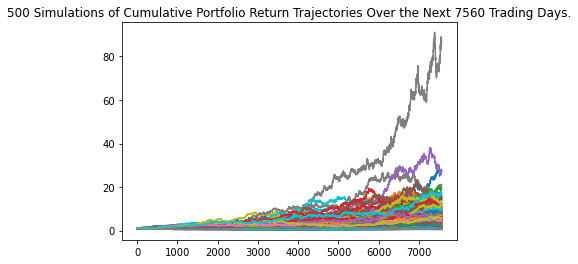

In [451]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_thirty_years_line_plot = MC_thirty_years.plot_simulation()

#save the plot for future use
MC_thirty_years_line_plot.get_figure().savefig("MC_thirty_years_line_plot.png",bbox_inches="tight")

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

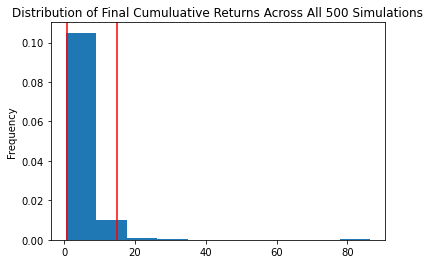

In [452]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_thirty_years_distribution_plot = MC_thirty_years.plot_distribution()

#Save the plot for future use
MC_thirty_years_distribution_plot.get_figure().savefig("MC_thirty_years_distribution_plot.png",bbox_inches="tight")

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [453]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
thirty_years_table = MC_thirty_years.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(thirty_years_table)

count           500.000000
mean              4.704846
std               5.208667
min               0.486310
25%               2.045966
50%               3.432636
75%               6.052996
max              86.399099
95% CI Lower      0.780620
95% CI Upper     14.996700
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [454]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current balance of the stock and bond: ${total_stocks_bonds:.2f}")


Current balance of the stock and bond: $60692.40


In [455]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = thirty_years_table[8] * total_stocks_bonds
ci_upper_thirty_cumulative_return = thirty_years_table[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of $60692.40 in the portfolio"
      f" with a 40% weight in AGG and 60% weight in SPY over the next 30 years will end within in the range of"
      f" ${ci_lower_thirty_cumulative_return:.2f} and ${ci_upper_thirty_cumulative_return:.2f}.")


There is a 95% chance that an initial investment of $60692.40 in the portfolio with a 40% weight in AGG and 60% weight in SPY over the next 30 years will end within in the range of $47377.73 and $910185.73.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [456]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_ten_years = MCSimulation(
                portfolio_data = prices_df,
                weights = [.20,.80],
                num_simulation = 500,
                num_trading_days = 252*10
                )

# Review the simulation input data
MC_ten_years.portfolio_data


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2019-07-15 04:00:00+00:00  110.87  110.9600  110.8500  110.95  3619089   
2019-07-16 04:00:00+00:00  110.75  110.8300  110.6400  110.83  2149083   
2019-07-17 04:00:00+00:00  110.93  111.1400  110.9100  111.12  2985610   
2019-07-18 04:00:00+00:00  111.10  111.3300  111.0600  111.30  5982223   
2019-07-19 04:00:00+00:00  111.22  111.2860  111.1400  111.17  3150774   
...                           ...       ...       ...     ...      ...   
2022-07-08 04:00:00+00:00  101.35  101.4499  101.1600  101.23  5269814   
2022-07-11 04:00:00+00:00  101.67  101.9200  101.6029  101.70  5758310   
2022-07-12 04:00:00+00:00  102.02  102.1900  101.8200  101.84  6664991   
2022-07-13 04:00:00+00:00  101.23  102.2400  101.1900  102.21  6514247   
2022-07-14 04:00:00+00:00  101.51  101.9800  101.3300  101.85  6224496   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00       10885  110.925638          NaN  301.12   
2019-07-16 04:00:00+00:00       12676  110.743438    -0.001082  300.64   
2019-07-17 04:00:00+00:00       11771  111.066605     0.002617  299.77   
2019-07-18 04:00:00+00:00       17331  111.220550     0.001620  297.18   
2019-07-19 04:00:00+00:00        9948  111.225017    -0.001168  300.01   
...                               ...         ...          ...     ...   
2022-07-08 04:00:00+00:00       19181  101.268556    -0.003740  387.16   
2022-07-11 04:00:00+00:00       17084  101.720884     0.004643  385.91   
2022-07-12 04:00:00+00:00       21057  102.039440     0.001377  383.66   
2022-07-13 04:00:00+00:00       26716  101.977478     0.003633  375.09   
2022-07-14 04:00:00+00:00       24722  101.747120    -0.003522  373.99   

                                                                            \
                               high      low   close    volume trade_count   
timestamp                                                                    
2019-07-15 04:00:00+00:00  301.1300  300.190  300.75  33992129      149900   
2019-07-16 04:00:00+00:00  300.8800  299.440  299.71  40807546      183816   
2019-07-17 04:00:00+00:00  299.9300  297.740  297.74  44343835      200151   
2019-07-18 04:00:00+00:00  299.2500  296.700  298.83  53567032      236661   
2019-07-19 04:00:00+00:00  300.0700  296.960  297.17  76794138      260715   
...                             ...      ...     ...       ...         ...   
2022-07-08 04:00:00+00:00  390.6400  385.660  388.67  72468892      509776   
2022-07-11 04:00:00+00:00  386.8700  383.500  384.23  58100363      473423   
2022-07-12 04:00:00+00:00  386.1600  378.990  380.83  62027220      512244   
2022-07-13 04:00:00+00:00  381.9200  374.658  378.83  83575452      671953   
2022-07-14 04:00:00+00:00  379.0498  371.040  377.91  89349688      637416   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  300.605019          NaN  
2019-07-16 04:00:00+00:00  300.108039    -0.003458  
2019-07-17 04:00:00+00:00  298.543544    -0.006573  
2019-07-18 04:00:00+00:00  298.067797     0.003661  
2019-07-19 04:00:00+00:00  298.617649    -0.005555  
...                               ...          ...  
2022-07-08 04:00:00+00:00  388.661805    -0.000823  
2022-07-11 04:00:00+00:00  384.871994    -0.011424  
2022-07-12 04:00:00+00:00  382.617620    -0.008849  
2022-07-13 04:00:00+00:00  378.819688    -0.005252  
2022-07-14 04:00:00+00:00  375.589384    -0.002429  

[757 rows x 16 columns]

In [457]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_ten_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/manisha_lal/work/FinTech/Week_5/challenge_5/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994198,1.002617,0.968251,0.988559,1.009301,1.000762,1.005181,0.980494,1.005409,1.010507,...,0.996283,1.005008,0.986942,0.988945,0.998985,1.009495,1.017295,0.988148,0.990766,0.988469
2,1.001730,0.961428,0.981251,0.984247,1.003627,0.993374,1.004926,0.968958,0.997937,1.003510,...,1.002533,1.015670,0.982334,0.986835,0.995483,0.990941,1.040032,1.002974,0.988665,0.993815
3,1.002971,0.957656,0.984560,0.987612,1.015369,0.990751,0.995342,0.949728,0.971044,1.009441,...,1.008619,1.015010,0.987307,0.972583,1.007379,0.991272,1.046691,1.011370,1.000588,1.009926
4,1.005916,0.958898,0.973358,0.975749,1.012724,0.976366,0.980017,0.962370,0.980571,1.032432,...,1.018136,1.026592,0.995782,0.970283,1.003484,0.985893,1.052042,1.027328,1.005227,1.030420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.582307,0.840764,0.922444,2.317744,0.676089,1.734825,1.638477,2.535873,2.589898,3.241815,...,1.966730,0.288891,2.407213,1.781011,1.295049,2.789225,1.031817,7.477242,0.849386,0.910245
2517,1.559187,0.834522,0.931588,2.316698,0.680094,1.733997,1.630729,2.556502,2.603400,3.278712,...,1.971089,0.287707,2.423773,1.771718,1.289815,2.838701,1.042422,7.580297,0.827617,0.899315
2518,1.563273,0.836131,0.923314,2.326057,0.686877,1.729484,1.639470,2.591409,2.583671,3.279831,...,1.993644,0.289503,2.452530,1.767024,1.295022,2.892901,1.028615,7.512227,0.817564,0.899700
2519,1.583867,0.845402,0.939970,2.321247,0.678464,1.714595,1.612108,2.599451,2.588872,3.328746,...,2.005964,0.283650,2.472155,1.773664,1.303201,2.879554,1.012865,7.403670,0.805136,0.894817


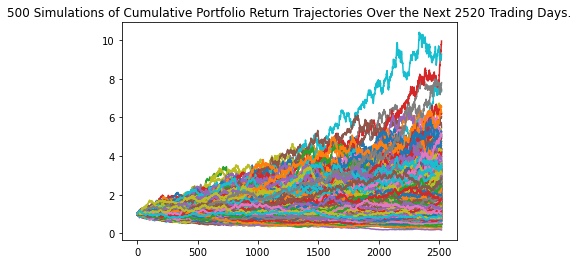

In [458]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_ten_years_line_plot = MC_ten_years.plot_simulation()

#Save the plot for future use
MC_ten_years_line_plot.get_figure().savefig("MC_ten_years_line_plot.png",bbox_inches="tight")


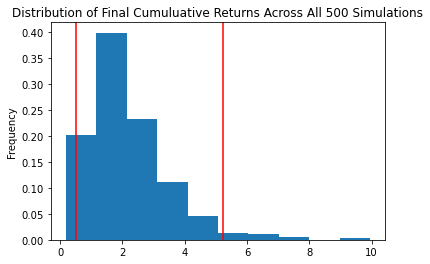

In [459]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_ten_years_dist_plot = MC_ten_years.plot_distribution()

#Save the plot for future use
MC_ten_years_dist_plot.get_figure().savefig("MC_ten_years_dist_plot.png",bbox_inches="tight")

In [460]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
ten_years_table = MC_ten_years.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
ten_years_table

count           500.000000
mean              2.162171
std               1.305393
min               0.180916
25%               1.264971
50%               1.863777
75%               2.770098
max               9.951722
95% CI Lower      0.505328
95% CI Upper      5.236823
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [461]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f"Current balance of the stock and bond: ${total_stocks_bonds:.2f}")



Current balance of the stock and bond: $60692.40


In [462]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = ten_years_table[8] * total_stocks_bonds
ci_upper_ten_cumulative_return = ten_years_table[9] * total_stocks_bonds

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of $60692.40 in the portfolio"
      f" with a 20% weight in AGG and 80% weight in SPY over the next 10 years will end within in the range of"
      f" ${ci_lower_ten_cumulative_return:.2f} and ${ci_upper_ten_cumulative_return:.2f}.")



There is a 95% chance that an initial investment of $60692.40 in the portfolio with a 20% weight in AGG and 80% weight in SPY over the next 10 years will end within in the range of $30669.58 and $317835.34.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?

**Answer** The portfolio with a 20% weight in AGG and 80% weight in SPY over the next 10 years will end within in the range of 30669.58 and 317835.34.An initial investment of 60692.40 in the portfolio with a 40/60 weight over the next 30 years will end within in the range of 47377.73 and 910185.73 which means weighing the portfolio with 40/60 will yield on an average in the range  of 15792.58 and 303395.24 every ten years.

Looking across both simulations, the portfolio breakdown with the greatest chance of success looks to be the ten years portfolio.Although both the portfolios have a chance to lose money, the ten years portfolio is roughly the same level of risk with far more upside potential that allows the credit union members to retire after only 10 years.